# Task 4: Loan Default Risk with Business Cost Optimization
## Objective
Build a model to predict loan default risk and optimize decision threshold to minimize financial loss.
## Dataset
The dataset contains borrower financial and credit history information used to predict whether a loan applicant will approve.

In [44]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

#### Load Dataset

In [45]:
df = pd.read_csv("credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


#### Data Cleaning & Pre_processing
Here we handle misssing values and clean data.

In [46]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [47]:
# Fill missing values with median
df["person_emp_length"].fillna(df["person_emp_length"].median(), inplace=True)
df["loan_int_rate"].fillna(df["loan_int_rate"].median(), inplace=True)

# Check again
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

Missing numerical values were handled using median imputation to preserve data

In [48]:
# Now lets check if there is any invalid values
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.767994,9589.371106,11.009620,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.087372,6322.086646,3.081611,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [49]:
df["person_home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [50]:
df["loan_intent"].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [51]:
df["loan_grade"].unique()

array(['D', 'B', 'C', 'A', 'E', 'F', 'G'], dtype=object)

In [52]:
df["cb_person_default_on_file"].unique()

array(['Y', 'N'], dtype=object)

There is no invalid values to handle

#### EDA
Now we will do Exploratory Data Analysis to understand borrower characteristics and their relationship with loan default.

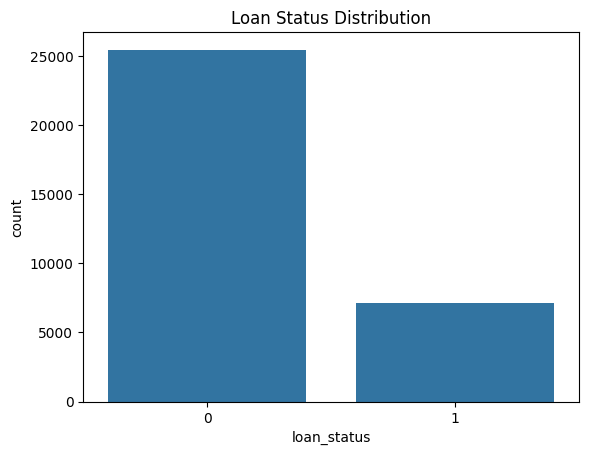

loan_status
0    0.781836
1    0.218164
Name: proportion, dtype: float64

In [53]:
# to check if data is imbalenced
sns.countplot(x='loan_status', data=df)
plt.title("Loan Status Distribution")
plt.show()

df['loan_status'].value_counts(normalize=True)

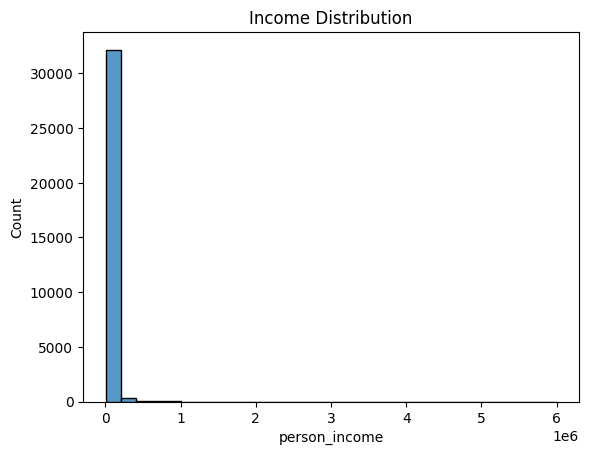

In [54]:
# Income Distribution
sns.histplot(df['person_income'], bins=30)
plt.title("Income Distribution")
plt.show()

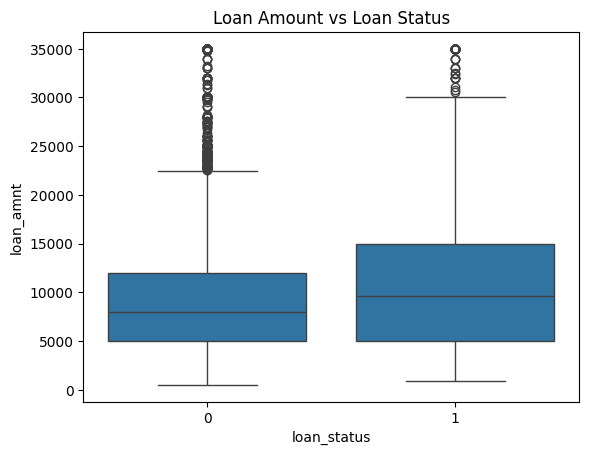

In [55]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)
plt.title("Loan Amount vs Loan Status")
plt.show()

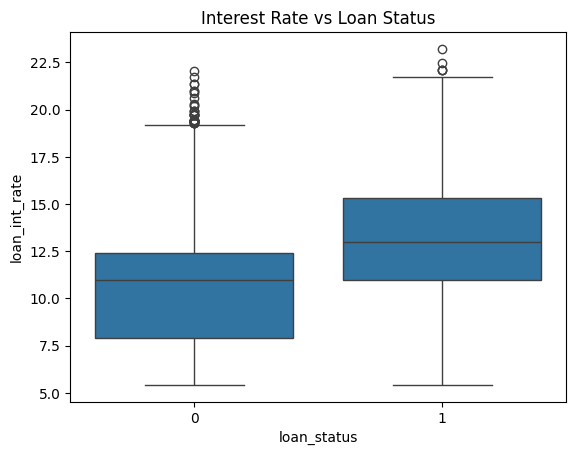

In [56]:
sns.boxplot(x='loan_status', y='loan_int_rate', data=df)
plt.title("Interest Rate vs Loan Status")
plt.show()

### Encode Categorical Variables
Here we convert Categorical Variables into numaric values so that matchine learing can understande them, using One-Hot Encoding.

In [57]:
x = df.drop("loan_status", axis=1)
y = df["loan_status"]

# Convert categorical columns into numeric using one-hot encoding
x = pd.get_dummies(x, drop_first=True)

# Check result
x.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,0.59,3,False,False,True,...,False,True,False,False,False,True,False,False,False,True
1,21,9600,5.0,1000,11.14,0.10,2,False,True,False,...,False,False,False,True,False,False,False,False,False,False
2,25,9600,1.0,5500,12.87,0.57,3,False,False,False,...,True,False,False,False,True,False,False,False,False,False
3,23,65500,4.0,35000,15.23,0.53,2,False,False,True,...,True,False,False,False,True,False,False,False,False,False
4,24,54400,8.0,35000,14.27,0.55,4,False,False,True,...,True,False,False,False,True,False,False,False,False,True


In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (26064, 22)
Test set shape: (6517, 22)


#### Model Training

In [59]:
# Lets apply standardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Features were scaled using StandardScaler to improve model performance.

In [60]:
# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#### Evaluation

In [61]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4830  242]
 [ 658  787]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      5072
           1       0.76      0.54      0.64      1445

    accuracy                           0.86      6517
   macro avg       0.82      0.75      0.78      6517
weighted avg       0.85      0.86      0.85      6517



The Logistic Regression model achieved 82% accuracy but showed low recall (33%) for defaulters, meaning many risky customers were not correctly identified.
In credit risk prediction, missing defaulters (false negatives) is more costly than incorrectly rejecting safe customers.

#### Cost Optimization
We will evaluate different probability thresholds and choose the one that minimizes total financial loss by balancing false positives and false negatives.

In [62]:
# Get probabilities
y_prob = model.predict_proba(X_test)[:,1]

# Logistic regression gives us probability not exact answer, the rule to convert this probability into 0 or 1 is called Threshold, default 0.5.
threshold = 0.3
y_pred_new = (y_prob > threshold).astype(int)

print(confusion_matrix(y_test, y_pred_new))

[[4470  602]
 [ 393 1052]]


Lowering the threshold increases the detection of defaulters (higher recall) but also increases false positives, allowing us to balance financial risk.

##### Calculate Cost for both Thresholds

# Costs
cost_fn = 10000  # fn: false negative
cost_fp = 1000   # fp: false positive

# For threshold 0.5
fp_05 = 197
fn_05 = 970

total_cost_05 = (fp_05 * cost_fp) + (fn_05 * cost_fn)

print("Total Cost at threshold 0.5:", total_cost_05)

In [63]:
# For threshold 0.3
fp_03 = 953
fn_03 = 518

total_cost_03 = (fp_03 * cost_fp) + (fn_03 * cost_fn)

print("Total Cost at threshold 0.3:", total_cost_03)

Total Cost at threshold 0.3: 6133000


Total financial loss was calculated using assumed costs for false positives and false negatives to determine the optimal classification threshold.

## Conclusion
Although the default 0.5 threshold produced higher accuracy, it resulted in significant financial loss due to missed defaulters. By lowering the threshold to 0.3, recall improved and total financial loss reduced substantially, saving approximately $3.76 million. This demonstrates the importance of cost-based optimization in credit risk modeling.